<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/Fujidescentproblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Setting up environment
from google.colab import files
uploaded = files.upload()




Saving mtfuji_data.csv to mtfuji_data (1).csv


[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]




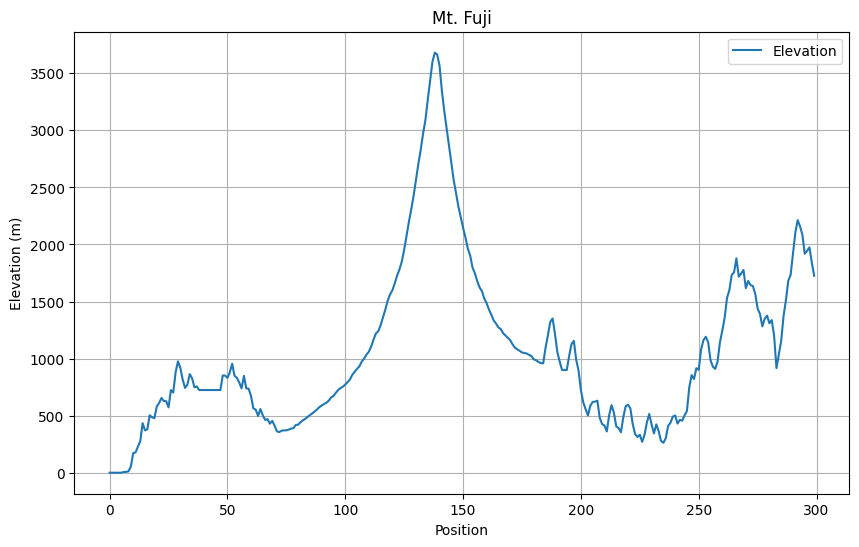

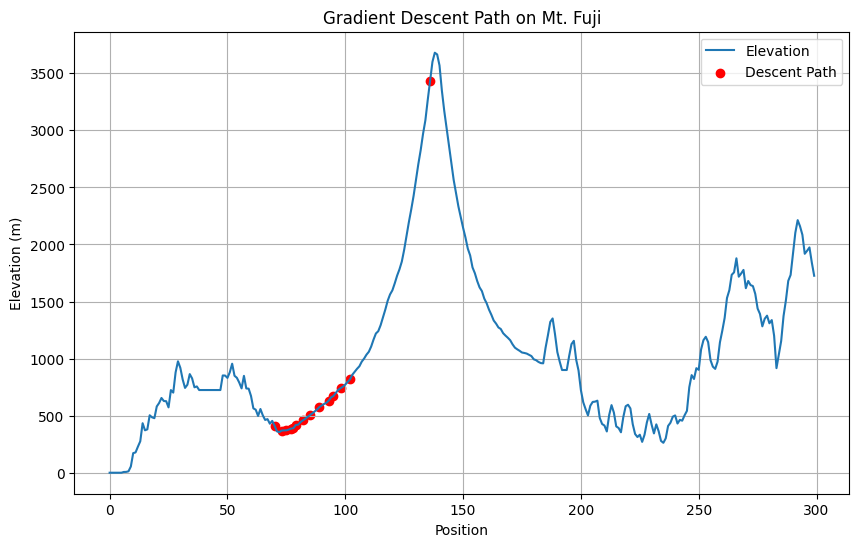

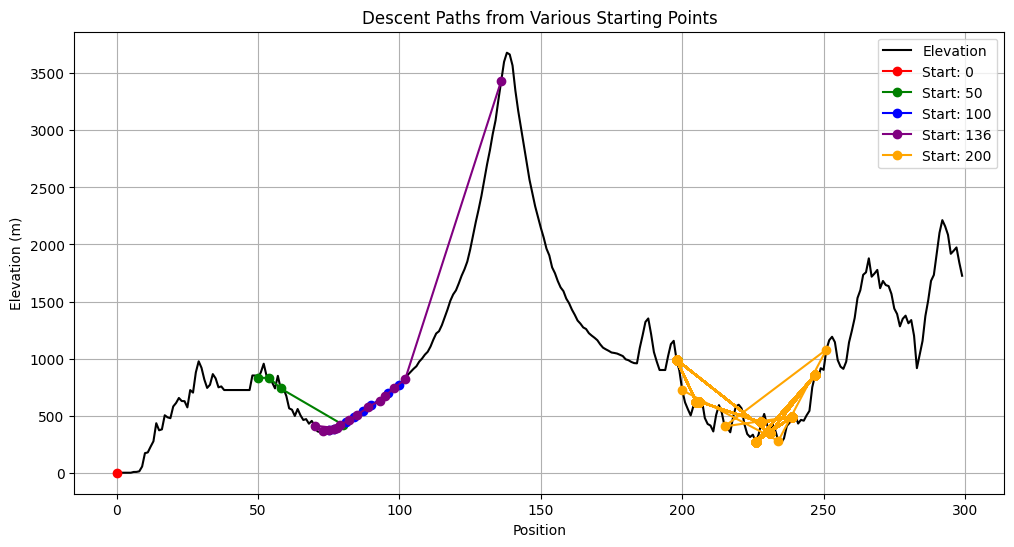

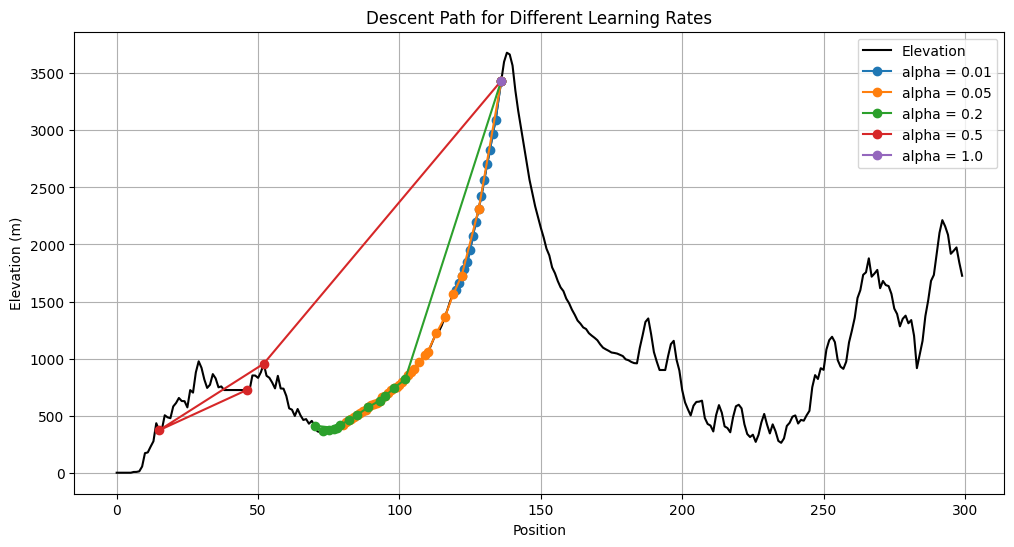

In [42]:
import numpy as np
import matplotlib.pyplot as plt

csv_path = "mtfuji_data.csv" #Specifying the file name path

np.set_printoptions(suppress=True)  # Setting prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[130:140])
print("\n")

#Problem 1: Data visualization
plt.figure(figsize=(10, 6))
plt.plot(fuji[:, 0], fuji[:, 3], label='Elevation')
plt.title("Mt. Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation (m)")
plt.grid(True)
plt.legend()
plt.show()
print("\n")

#Problem 2: Create a function to calculate the gradient at a certain point
def calculate_gradient(point, data):
    if point <= 0:
        return 0
    x_diff = 1  # difference between points (always 1 step back)
    y_diff = data[point][3] - data[point - 1][3]
    return y_diff / x_diff

#Problem 3: Create a function to calculate the destination point
def update_point(current_point, data, alpha=0.2):
    gradient = calculate_gradient(current_point, data)
    next_point = current_point - alpha * gradient
    next_point = int(round(next_point))

    # Staying within bounds
    next_point = max(0, min(next_point, len(data) - 1))
    return next_point

#Problem 4: Create a function to go down the mountain
def compute_gradient(point, data):
    if point <= 0:
        return 0
    dy = data[point][3] - data[point - 1][3]
    dx = data[point][0] - data[point - 1][0]
    return dy / dx

def descend_mountain(start_point, data, alpha=0.2, max_iters=1000):
    point = start_point
    history = [point]

    for _ in range(max_iters):
        grad = compute_gradient(point, data)
        next_point = int(round(point - alpha * grad))

        # Stay within bounds
        if next_point < 0 or next_point >= len(data):
            break

        # Break if no change in position
        if next_point == point:
            break

        history.append(next_point)
        point = next_point

    return history


#Problem 5: Visualization of the descent process
def visualize_descent(point_history, data):
    elevations = [data[p][3] for p in point_history]

    plt.figure(figsize=(10, 6))
    plt.plot(data[:, 0], data[:, 3], label='Elevation')
    plt.scatter(point_history, elevations, c='red', label='Descent Path')
    plt.title("Gradient Descent Path on Mt. Fuji")
    plt.xlabel("Position")
    plt.ylabel("Elevation (m)")
    plt.legend()
    plt.grid(True)
    plt.show()
    print("\n")

history = descend_mountain(136, fuji, alpha=0.2)
visualize_descent(history, fuji)

#Problem 6: Change of initial value
all_histories = []
for start in range(len(fuji)):
    history = descend_mountain(start, fuji, alpha=0.2)
    all_histories.append(history)

#Problem 7: Visualization of the descent process for each initial value
colors = ['red', 'green', 'blue', 'purple', 'orange']
start_points = [0, 50, 100, 136, 200]

plt.figure(figsize=(12, 6))
plt.plot(fuji[:, 0], fuji[:, 3], label='Elevation', color='black')

for i, start in enumerate(start_points):
    history = descend_mountain(start, fuji, alpha=0.2)
    elevations = [fuji[p][3] for p in history]
    plt.plot(history, elevations, marker='o', label=f'Start: {start}', color=colors[i % len(colors)])

plt.title("Descent Paths from Various Starting Points")
plt.xlabel("Position")
plt.ylabel("Elevation (m)")
plt.legend()
plt.grid(True)
plt.show()
print("\n")

#Problem 8: (Advance problem) Hyperparameter changes
alphas = [0.01, 0.05, 0.2, 0.5, 1.0]
start_point = 136

plt.figure(figsize=(12, 6))
plt.plot(fuji[:, 0], fuji[:, 3], label='Elevation', color='black')

for alpha in alphas:
    history = descend_mountain(start_point, fuji, alpha)
    elevations = [fuji[p][3] for p in history]
    plt.plot(history, elevations, marker='o', label=f'alpha = {alpha}')

plt.title("Descent Path for Different Learning Rates")
plt.xlabel("Position")
plt.ylabel("Elevation (m)")
plt.legend()
plt.grid(True)
plt.show()

